### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

### Reading csv file

In [2]:
df = pd.read_csv("honeyproduction.csv")
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


### Annual Honey Production

In [3]:
prod_per_year = df.groupby('year').totalprod.mean().reset_index()
prod_per_year.head()

,year,totalprod
0,1998,5.105093e+06
1,1999,4.706674e+06
2,2000,5.106000e+06
3,2001,4.221545e+06
4,2002,3.892386e+06


### Years

In [4]:
X = prod_per_year.year
X = X.values.reshape(-1, 1)
X

array([[1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012]], dtype=int64)

### Yearly Production

In [5]:
y = prod_per_year.totalprod
y

0     5.105093e+06
1     4.706674e+06
2     5.106000e+06
3     4.221545e+06
4     3.892386e+06
5     4.122091e+06
6     4.456805e+06
7     4.243146e+06
8     3.761902e+06
9     3.600512e+06
10    3.974927e+06
11    3.626700e+06
12    4.382350e+06
13    3.680025e+06
14    3.522675e+06
Name: totalprod, dtype: float64

### Graphical Representation of Annual Honey Production

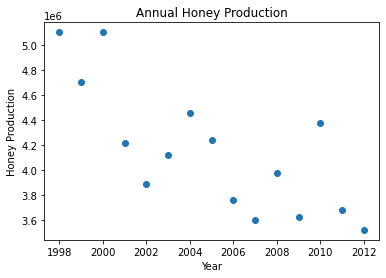

In [6]:
plt.scatter(X, y)
plt.xlabel('Year')
plt.ylabel('Honey Production')
plt.title('Annual Honey Production')
plt.show()

### Linear Model

In [7]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

### Slope of the model

In [8]:
regr.coef_

array([-88303.18915238])

### Intercept of the model

In [9]:
regr.intercept_

181208083.10732982

### Predicted Honey Production

In [10]:
y_predict = regr.predict(X)
y_predict

array([4778311.18087068, 4690007.99171829, 4601704.8025659 ,
       4513401.61341354, 4425098.42426115, 4336795.23510876,
       4248492.04595637, 4160188.85680401, 4071885.66765162,
       3983582.47849923, 3895279.28934687, 3806976.10019448,
       3718672.91104209, 3630369.7218897 , 3542066.53273734])

### Graphical Representation of Annual Honey Production as Predicted by Linear Model

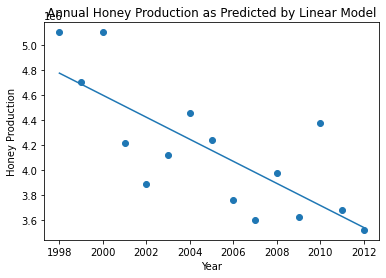

<Figure size 432x288 with 0 Axes>

In [11]:
plt.scatter(X, y)
plt.plot(X, y_predict)
plt.xlabel('Year')
plt.ylabel('Honey Production')
plt.title('Annual Honey Production as Predicted by Linear Model')
plt.show()
plt.clf()

### Future Honey Production Projections

In [12]:
X_future = np.array(range(2013, 2051))
X_future = X_future.reshape(-1, 1)
future_predict = regr.predict(X_future)
future_predict

array([3453763.34358495, 3365460.15443256, 3277156.96528018,
       3188853.77612782, 3100550.58697543, 3012247.39782304,
       2923944.20867065, 2835641.01951829, 2747337.8303659 ,
       2659034.64121351, 2570731.45206112, 2482428.26290876,
       2394125.07375637, 2305821.88460398, 2217518.69545159,
       2129215.50629923, 2040912.31714684, 1952609.12799445,
       1864305.93884209, 1776002.7496897 , 1687699.56053731,
       1599396.37138492, 1511093.18223256, 1422789.99308017,
       1334486.80392778, 1246183.61477539, 1157880.42562303,
       1069577.23647064,  981274.04731825,  892970.85816586,
        804667.6690135 ,  716364.47986111,  628061.29070872,
        539758.10155633,  451454.91240397,  363151.72325158,
        274848.53409919,  186545.34494683])

### Graphical Representation of Future Honey Production Projections

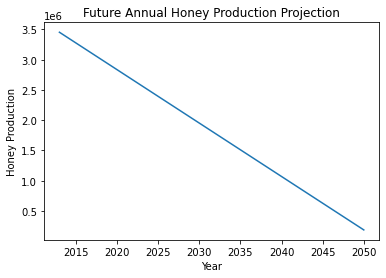

In [13]:
plt.plot(X_future, future_predict)
plt.xlabel('Year')
plt.ylabel('Honey Production')
plt.title('Future Annual Honey Production Projection')
plt.show()